In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df= pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [7]:
### Seperate x and y

In [8]:
x= df.drop(columns=['species'],axis =1)
y= df[['species']]

In [9]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


### Apply Label encoding to Y

In [11]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
y['species']= le.fit_transform(y)
y.head()

,species
0,0
1,0
2,0
3,0
4,0


In [12]:
y['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [13]:

# setosa -------> 0
# versicolor----> 1
# virginica-----> 2

### Create Pipeline for X features

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [15]:
# Creating pipeline for numeric data
num_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())])

In [16]:
x_pre= num_pipe.fit_transform(x)
x_pre[0:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [17]:
cols= num_pipe.get_feature_names_out()

In [18]:
cols

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [19]:
x_pre= pd.DataFrame(x_pre,columns=cols)

In [20]:
x_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### Train test split

In [21]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest= train_test_split(x_pre, y, test_size=0.33, random_state=55)

In [22]:
xtrain.shape

(100, 4)

In [23]:
ytest.shape

(50, 1)

### built a KNN base model

In [24]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier(n_neighbors=10) 
# n_neighbor= Number of neighbors to use by default for kneighbors
model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=10)

In [25]:
# Accuracy of model in training
model.score(xtrain,ytrain)

0.96

In [26]:
model.score(xtest,ytest)

0.98

### Tune the model with hyperparams

In [27]:
params= {'n_neighbors':[2,3,4,5,6,7,8,9]}


In [28]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
gscv= GridSearchCV(knn,param_grid=params,cv=5, scoring='f1_macro')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='f1_macro')

In [29]:
gscv.best_params_

{'n_neighbors': 7}

In [30]:
gscv.best_score_

0.939159174159174

In [31]:
best_knn= gscv.best_estimator_
best_knn

KNeighborsClassifier(n_neighbors=7)

### Evaluate the model

In [32]:
ypred_tr= best_knn.predict(xtrain)
ypred_ts= best_knn.predict(xtest)

In [33]:
ypred_tr

array([2, 0, 1, 2, 1, 0, 0, 1, 0, 0, 1, 2, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0,
       2, 1, 0, 0, 2, 2, 1, 1, 1, 2, 2, 0, 0, 2, 1, 0, 1, 1, 0, 2, 2, 1,
       1, 0, 1, 1, 2, 2, 0, 2, 1, 0, 0, 0, 0, 2, 1, 1, 2, 2, 1, 0, 2, 1,
       1, 1, 0, 2, 1, 2, 1, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 2, 2, 2, 1, 0,
       2, 1, 1, 0, 2, 1, 1, 0, 1, 0, 2, 0])

In [34]:
ytrain.head()

,species
129,2
5,0
51,1
145,2
96,1


In [35]:
ypred_ts[0:5]

array([0, 0, 0, 2, 2])

In [36]:
ytest.head()

,species
9,0
36,0
8,0
137,2
136,2


In [37]:
best_knn.score(xtrain,ytrain)

0.96

In [38]:
best_knn.score(xtest,ytest)

0.96

### check the confusion mtrix

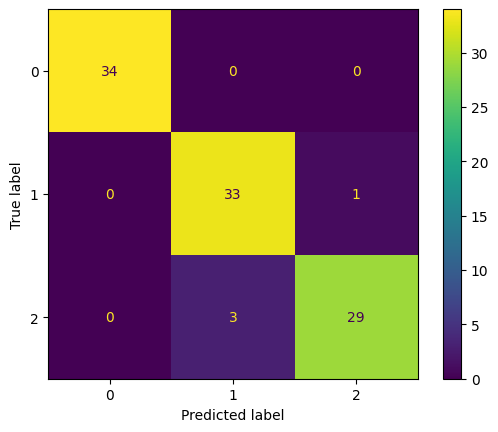

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf= confusion_matrix(ytrain, ypred_tr)
cfd= ConfusionMatrixDisplay(cf,display_labels=best_knn.classes_)
cfd.plot()


### Print classificaation report

In [40]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.94      0.94      0.94        16
           2       0.95      1.00      0.97        18

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



### Getting original labels for Y

In [41]:
ypred_tr_lb= le.inverse_transform(ypred_tr)
ypred_ts_lb= le.inverse_transform(ypred_ts)

In [42]:
ypred_tr_lb

array(['virginica', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'setosa', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'virginica', 'setosa', 'virginica', 'versicolor', 'virginica',
       'setosa', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'virginica', 'versicolor',
   

In [43]:
ypred_ts_lb

array(['setosa', 'setosa', 'setosa', 'virginica', 'virginica', 'setosa',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa',
       'versicolor', 'virginica', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'setosa', 'virginica', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'virginica', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'virginica', 'virginica', 'setosa', 'virginica'],
      dtype=object)

In [44]:
best_knn.predict_proba(xtest)

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.14285714, 0.85714286],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.42857143, 0.57142857],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.71428571, 0.28571429],
       [0.        , 0.85714286, 0.14285714],
       [0.42857143, 0.57142857, 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.71428571, 0.28571429],
       [0.        , 0.        , 1.        ],
       [0.

In [45]:
best_knn.predict_proba(xtest).max()

1.0

### Predicting species for new input

In [46]:
def predict():
    # Taking input
    sep_len = float(input('Sepal Length: '))
    sep_wid = float(input('Sepal Width: '))
    pet_len = float(input('Petal length: '))
    pet_wid = float(input('Petal_Width: '))

    #Converting input into Dataframe
    xnew = pd.DataFrame([sep_len,sep_wid, pet_len, pet_wid]).T
    xnew.columns = ['sepal_length','sepal_width','petal_length','petal_width']

    # Display Dataframe
    print('Dataframe before preprocessing: \n')
    display(xnew)

    #Preprocessing the Dataframe
    xnew_pre= num_pipe.transform(xnew)
    xnew_pre= pd.DataFrame(xnew_pre, columns=cols)

    # Display Preprocessed Dataframe
    print('\nDataframe After Preprocessing: \n')
    display(xnew_pre)

    #Predict the data
    pred = best_knn.predict(xnew_pre)

    # LabelENcoder
    #pred_lb= le.inverse_transform(pred)--> Here labels are comming tn array format 
    # But we wnat labels in String format nd not array format so here we given [0]
    pred_lb = le.inverse_transform(pred)[0]

    # Get The probability of prediction
    proba= best_knn.predict_proba(xnew_pre).max()

    # Print the results
    print('\n====================================================\n')
    print(f'Predicted Species : {pred_lb} with Probability : {proba:.4f}')

    return pred_lb, proba


In [47]:
predict()

Dataframe before preprocessing: 



,sepal_length,sepal_width,petal_length,petal_width
0,6.4,2.9,4.3,1.3



Dataframe After Preprocessing: 



,sepal_length,sepal_width,petal_length,petal_width
0,0.674501,-0.362176,0.308059,0.13251




Predicted Species : versicolor with Probability : 1.0000


('versicolor', 1.0)

In [48]:
predict()

Dataframe before preprocessing: 



,sepal_length,sepal_width,petal_length,petal_width
0,5.3,3.8,1.5,0.4



Dataframe After Preprocessing: 



,sepal_length,sepal_width,petal_length,petal_width
0,-0.658345,1.709595,-1.283389,-1.05218




Predicted Species : setosa with Probability : 1.0000


('setosa', 1.0)